In [28]:
import os
import pandas as pd
import json
import seaborn as sns

project_dir = os.path.join(os.curdir, "project")
project_dir

'.\\project'

In [29]:
training_result = {}
inf_result = {}
sorted_inf_result = {}

for exp in os.listdir(project_dir):
    directory = os.path.join(project_dir, exp)

    try:
        file = open(os.path.join(directory, "mlperf_cloudmask.log"), "r")
    except FileNotFoundError:
        continue

    data = None
    for line in file:
        if "result" in line:
            data = line.rstrip()

    if not data:
        continue

    data = json.loads(data[9:])

    loss = data["value"]["training"]["history"]["loss"]
    accuracy = data["value"]["training"]["history"]["accuracy"]
    val_loss = data["value"]["training"]["history"]["val_loss"]
    val_accuracy = data["value"]["training"]["history"]["val_accuracy"]
    epochs = len(accuracy)

    df = pd.DataFrame(list(zip(loss, accuracy, val_loss, val_accuracy)), columns=["Loss", "Accuracy", "ValLoss", "ValAccuracy"])

    training_result[epochs] = df

    inference = data["value"]["inference"]["accuracy"]
    if len(inference) != 100:
        continue
    inf_result[epochs] = inference

    for i in range(len(inference)):
        inference[i] = float(inference[i])

    inference.sort(reverse=True)
    sorted_inf_result[epochs] = inference


In [30]:
from pprint import pprint
inf_df = pd.DataFrame(inf_result)
sorted_inf_df = pd.DataFrame(sorted_inf_result)

#pprint(sorted_inf_result)
display(sorted_inf_df)


,100,10,1,30,50
0,0.962921,0.962921,0.962921,0.962921,0.962921
1,0.960064,0.960064,0.960064,0.960064,0.960064
2,0.959243,0.959243,0.959243,0.959243,0.959243
3,0.956681,0.956681,0.956681,0.956681,0.956681
4,0.946067,0.946067,0.946067,0.946067,0.946067
...,...,...,...,...,...
95,0.580571,0.580571,0.580571,0.580571,0.580571
96,0.553338,0.553338,0.553338,0.553338,0.553338
97,0.531188,0.531188,0.531188,0.531188,0.531188
98,0.503403,0.503403,0.503403,0.503403,0.503403


In [31]:
print(sorted_inf_df.to_string())

         100       10        1         30        50 
0   0.962921  0.962921  0.962921  0.962921  0.962921
1   0.960064  0.960064  0.960064  0.960064  0.960064
2   0.959243  0.959243  0.959243  0.959243  0.959243
3   0.956681  0.956681  0.956681  0.956681  0.956681
4   0.946067  0.946067  0.946067  0.946067  0.946067
5   0.942953  0.942953  0.942953  0.942953  0.942953
6   0.941927  0.941927  0.941927  0.941927  0.941927
7   0.933012  0.933012  0.933012  0.933012  0.933012
8   0.932646  0.932646  0.932646  0.932646  0.932646
9   0.931296  0.931296  0.931296  0.931296  0.931296
10  0.922054  0.922054  0.922054  0.922054  0.922054
11  0.921224  0.921224  0.921224  0.921224  0.921224
12  0.919211  0.919211  0.919211  0.919211  0.919211
13  0.918386  0.918386  0.918386  0.918386  0.918386
14  0.916601  0.916601  0.916601  0.916601  0.916601
15  0.914037  0.914037  0.914037  0.914037  0.914037
16  0.912941  0.912941  0.912941  0.912941  0.912941
17  0.912114  0.912114  0.912114  0.912114  0.

<AxesSubplot: ylabel='1'>

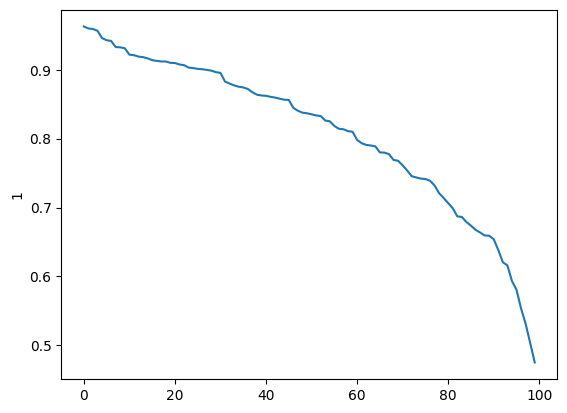

In [32]:
sns.lineplot(sorted_inf_df, y=1, x=sorted_inf_df.index)
# df = sorted_inf_df
# print(df.keys())
# df['x'] = df.index
# df['y'] = df[1]
#
# sns.lineplot(sorted_inf_df, y='y', x='x')


In [33]:
sorted_inf_df.describe()

,100,10,1,30,50
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.809146,0.809146,0.809146,0.809146,0.809146
std,0.112958,0.112958,0.112958,0.112958,0.112958
min,0.474946,0.474946,0.474946,0.474946,0.474946
25%,0.741824,0.741824,0.741824,0.741824,0.741824
50%,0.836108,0.836108,0.836108,0.836108,0.836108
75%,0.901655,0.901655,0.901655,0.901655,0.901655
max,0.962921,0.962921,0.962921,0.962921,0.962921
